In [58]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from scipy.misc import toimage
# # from keras.models import Sequential
# # from keras.layers.core import Dense, Activation, Dropout
# # from keras.layers.recurrent import LSTM, SimpleRNN
# # from keras.layers.wrappers import TimeDistributed
# import argparse
# from RNN_utils import *
from matplotlib import pyplot
%matplotlib inline

In [73]:
SEQ_LENGTH = 50
HIDDEN_DIM = 500
SEQUENCE_LENGHT = 50

In [74]:
def make_data():
    """
    To read data from file and and generate training set
    """
    fileContent = open('shakespeare_input.txt', 'r').read()
    charactersInFile = list(set(fileContent))
    uniqueCharacters = len(charactersInFile)

    number_to_Character = {number:character for number, character in enumerate(charactersInFile)}
    Character_to_number = {character:number for number, character in enumerate(charactersInFile)}

    X = np.zeros((len(fileContent)/SEQUENCE_LENGHT, SEQUENCE_LENGHT, uniqueCharacters))
    y = np.zeros((len(fileContent)/SEQUENCE_LENGHT, SEQUENCE_LENGHT, uniqueCharacters))

    for i in range(0, len(fileContent)/SEQUENCE_LENGHT):
        X_sequence = fileContent[i*SEQUENCE_LENGHT:(i+1)*SEQUENCE_LENGHT]

        print ("X_Sequence : ", X_sequence)
        X_sequence_ix = [Character_to_number[value] for value in X_sequence]
    #     print (X_sequence_ix)
        input_sequence = np.zeros((SEQUENCE_LENGHT, uniqueCharacters))
        for eachCharNo in range(SEQUENCE_LENGHT):
            input_sequence[eachCharNo][X_sequence_ix[eachCharNo]] = 1.
            X[i] = input_sequence
    #     print (list(input_sequence))
        y_sequence = fileContent[i*SEQUENCE_LENGHT+1:(i+1)*SEQUENCE_LENGHT+1]
        print  ("y_Sequence : ",y_sequence)
        y_sequence_ix = [Character_to_number[value] for value in y_sequence]
        target_sequence = np.zeros((SEQUENCE_LENGHT, uniqueCharacters))
        for eachCharNo in range(eachCharNo):
            target_sequence[eachCharNo][y_sequence_ix[eachCharNo]] = 1.
            y[i] = target_sequence
        # This code snippet is for visualization only
        print ("Original String")
        pyplot.imshow(toimage(input_sequence)) #showing first image
        pyplot.show()
        print ("Mutated String")
        pyplot.imshow(toimage(target_sequence)) #showing first image
        pyplot.show()
        break
        return X, y, uniqueCharacters, number_to_Character

X_Sequence :  We are accounted poor citizens, the patricians goo
y_Sequence :  e are accounted poor citizens, the patricians good
Original String


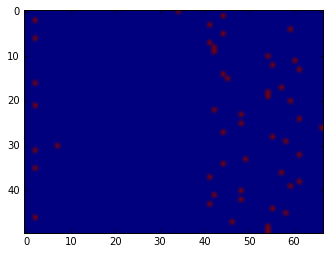

Mutated String


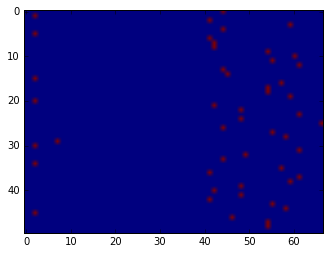

In [75]:
make_data()

In [ ]:
# Creating and compiling the Network
model = Sequential()
model.add(LSTM(HIDDEN_DIM, input_shape=(None, VOCAB_SIZE), return_sequences=True))
for i in range(LAYER_NUM - 1):
  model.add(LSTM(HIDDEN_DIM, return_sequences=True))
model.add(TimeDistributed(Dense(VOCAB_SIZE)))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")